## Домашнее задание

### Задача 40


In [ ]:
import pandas as pd


df = pd.read_csv("sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Работать с файлом california_housing_train.csv, который находится в папке sample_data.
# Определить среднее значение стоимости дома, где кол-во людей от 0 до 500 (population)
# df.loc[df['population'] < 500, 'median_house_value'].describe()['mean']
# df.loc[df['population'] < 500, 'median_house_value'].mean()
# df[df['population'] < 500]['median_house_value'].mean()
df = df[df['population'] < 500]
sum(df['median_house_value'])/len(df['median_house_value'])

# 2 8 10 15 18 20 27 34
# mean() - 16.75
# median() - (15 + 18) / 2 = 16.5

206683.83635227982

### Задача 42

In [ ]:
# Узнать какая максимальная households в зоне минимального значения population
df[df['population'] == df['population'].min()]['households'].max()

4.0

## Семинарские задания

### Задача 63

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.title("Карта")
plt.xlabel("Долгота")
plt.ylabel("Широта")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value');
plt.legend(df['median_house_value'], title='Стоимость дома');
# sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value']);

In [ ]:
sns.scatterplot(data=df, x='population', y='households');

<Figure size 1400x800 with 0 Axes>

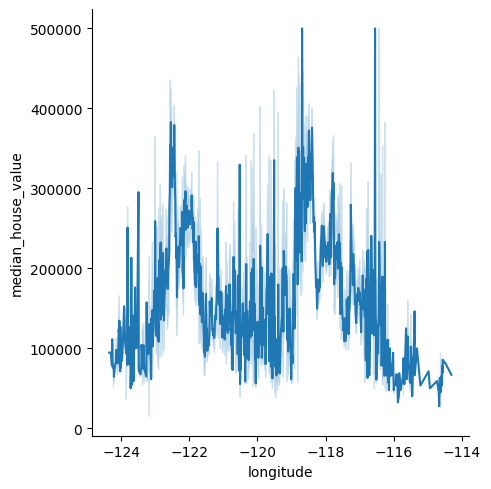

In [ ]:
# sns.lineplot(data=df, x='longitude', y='median_house_value');
plt.figure(figsize=(14, 8))
sns.relplot(data=df, x='longitude', y='median_house_value', kind='line');

In [ ]:
sns.histplot(x=df['housing_median_age']);

In [ ]:
sns.histplot(x=df['median_house_value'], hue=df['housing_median_age']);

### Задача 65

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

# species	- вид
# island - место обитания(остров)
# bill_length_mm - длина клюва
# bill_depth_mm - ширина клюва
# flipper_length_mm - размах крыльев
# body_mass_g - масса пингвина
# sex - пол

# print(penguins.shape)
# print(penguins.isnull().sum())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='island');

In [ ]:
new_data = penguins[penguins['island'] == "Biscoe"]
sns.scatterplot(data=new_data, x='body_mass_g', y='flipper_length_mm', hue='species');

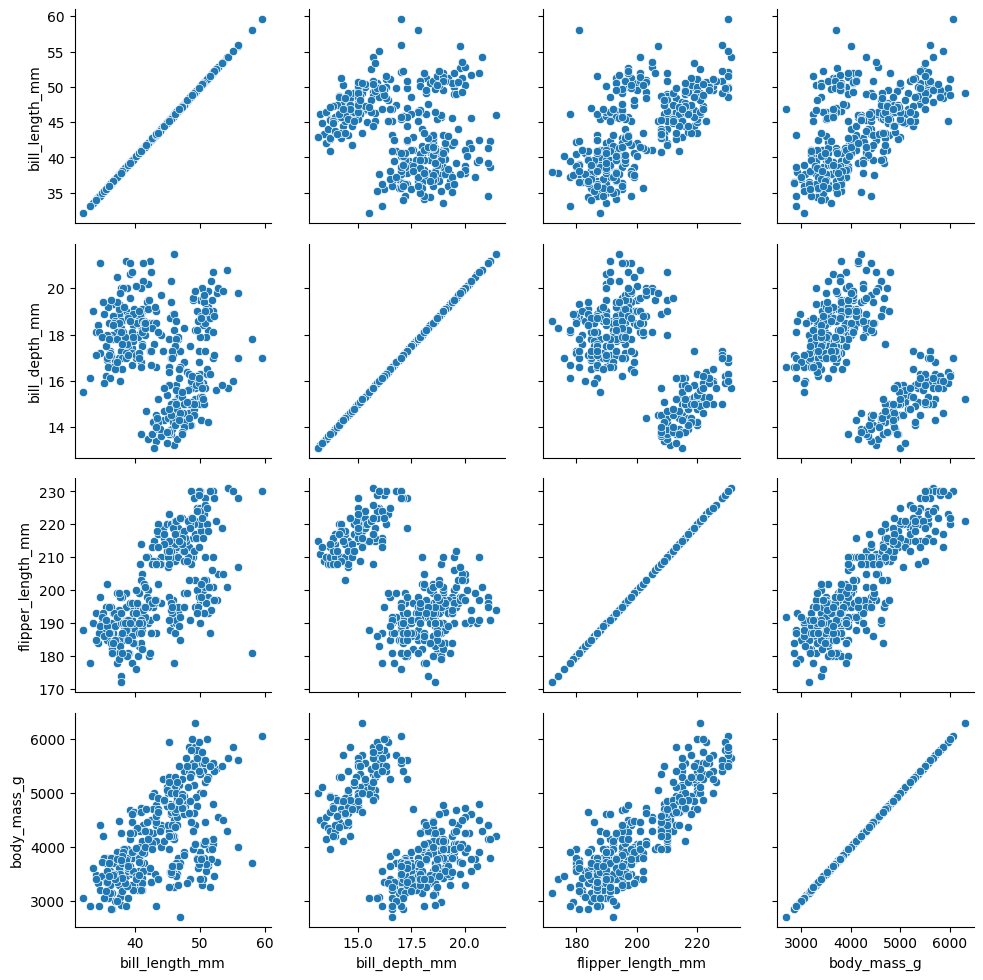

In [ ]:
lst = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
g = sns.PairGrid(penguins[lst])
g.map(sns.scatterplot);

In [ ]:
sns.heatmap(penguins[lst]);

### Задача 67

In [ ]:
penguins.loc[penguins['bill_length_mm'] >= 42, 'height_group'] = 'high'
penguins.loc[(penguins['bill_length_mm'] >= 35) & (penguins['bill_length_mm'] < 42), 'height_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] < 35, 'height_group'] = 'low'
penguins

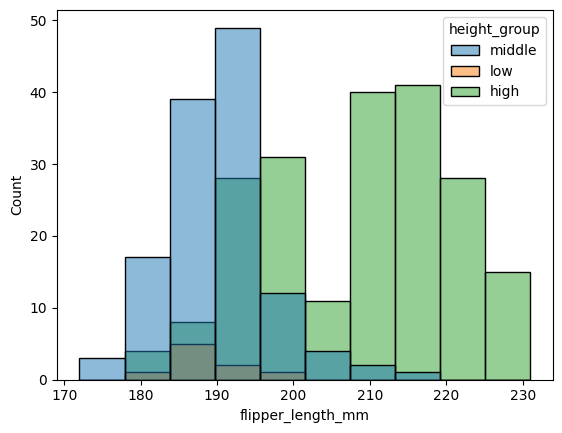

In [ ]:
sns.histplot(x=penguins['flipper_length_mm'], hue=penguins['height_group']);